
<table>
    <th> <img src="images/python.jpg" style="width: 200px;"> </th>
    <th><h1>PYCON NIGERIA 2019</h1></th>
 </table>
 
### **TOPIC:** A Practical Guide to Feature Engineering in Python.

#### **DELIVERED AT:** PyCon Nigeria 2019 Workshop

#### **BY:** <b>Rising Odegua</b>

#### Table of Contents
<ul>
    <li>WHAT IS FEATURE ENGINEERING?</li>
    <li>WORKING WITH MSSING VALUES</li>
    <li>WORKING WITH CATEGORICAL FEATURES</li>
    <li>Working WITH NUMERIC/CONTINOUS FEATURES</li>
    <li>POLYNOMIAL FEATURES</li>
    <li>NORMALIZATION OF FEATURES</li>
    <li>WORKING WITH DATE/TIME FEATURES</li>
    <li>WORKING WITH LATITUDES AND LONGITUDES FEATURES</li>
    <li>AUTO FEATURE ENGINEERING WITH DEEP FEATURE SYNTHESIS (Featuretools)</li>

</ul>

### What is Feature Engineering?

<img src="images/pic1.png">

### Is Feature Engineering Important?

### Well... hear from industry experts!


<table>
    <th> <img src="images/ngsay.png" style="width: 500px;"> </th>
    <th> <img src="images/pic2.png" style="width: 500px;"> </th>

 </table>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



#load some datasets
loan_demographics = pd.read_csv('traindemographics.csv')
loan_prev = pd.read_csv('trainprevloans.csv')
loan_perf = pd.read_csv('trainperf.csv')

GET DATA SET FROM [HERE](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data)

In [2]:
loan_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [3]:
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [4]:
loan_prev.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


### WORKING WITH MSSING VALUES

FOR CATEGORICAL FEATURES

    >>> Popular method is mode filling.
    >>> Convert to numerical features (Encoding) and fill with mean/median
    >>> Temporal Filling (forward fill, backward fill
    
FOR NUMERICAL FEATURES

    >>> Fill with mean/mode/median
    >>> Forward of Backward Fill
    >>> Use modeling to learn fill values
    
EXTRA TIP: Create a column to capture missing values before filling

In [24]:
#Fill categorical
print("shape of loan_demographic is {}".format(loan_demographics.shape))
loan_demographics.isna().sum()

shape of loan_demographic is (4346, 9)


customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [25]:
print("shape of loan_perf is {}".format(loan_perf.shape))
loan_perf.isna().sum()

shape of loan_perf is (4368, 10)


customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [26]:
print("shape of loan_prev is {}".format(loan_prev.shape))
loan_prev.isna().sum()

shape of loan_prev is (18183, 13)


Unnamed: 0             0
customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             5
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [27]:
#drop column bank_branch_clients
loan_demographics.drop('bank_branch_clients', axis=1, inplace=True)
loan_perf.drop('referredby', axis=1, inplace=True)
loan_prev.drop('referredby', axis=1, inplace=True)

### FILL MISSING IN CATEGORICAL FEATURES

In [28]:
loan_demographics['employment_status_clients'].value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [29]:
#fill with mode (Permanent)
loan_demographics['employment_status_clients'] = loan_demographics['employment_status_clients'].fillna(value='Permanent')
loan_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

### FILL MISSING IN NUMERICAL FEATURES

In [30]:
#Fill with mean
loan_prev['loanamount'] = loan_prev['loanamount'].fillna(round(loan_prev['loanamount'].mean()))

In [31]:
#Fill with mode
loan_prev['loanamount'] = loan_prev['loanamount'].fillna(round(loan_prev['loanamount'].mode()))

In [32]:
#Fill with median
loan_prev['loanamount'] = loan_prev['loanamount'].fillna(round(loan_prev['loanamount'].median()))

TRAIN A LINEAR MODEL TO FILL MISSING

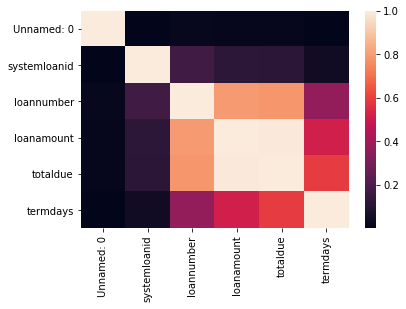

In [33]:
#get correlated values
sns.heatmap(loan_prev.corr())

In [5]:
to_train = ['loannumber', 'loanamount', 'totaldue', 'termdays']

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

loan_data = loan_prev[to_train]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = loan_data[loan_data['loanamount'].notnull()].drop(columns='loanamount')
y_train = loan_data[loan_data['loanamount'].notnull()]['loanamount']
x_test = loan_data[loan_data['loanamount'].isnull()].drop(columns='loanamount')


lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(np.round(pred))

loan_prev.loanamount[loan_prev.loanamount.isnull()] = pred

[57204. 56548. 56815. 57257. 57204.]


USE SKLEARN ITERATIVEIMPUTER TO FILL MISSING

In [36]:
#get the index of missing so we can see the values used for filling
missing_indx = list(loan_prev['loanamount'][loan_prev['loanamount'].isna()].index)
missing_indx

[]

In [37]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(n_estimators=10), max_iter=5, random_state=1)

loan_prev[to_train] = pd.DataFrame(imp.fit_transform(loan_prev[to_train]), columns=to_train)

In [38]:
loan_prev['loanamount'][missing_indx]

Series([], Name: loanamount, dtype: float64)

---------------------------------------------------------------------------------------------------------------------
### WORKING WITH CATEGORICAL FEATURES

Categorical features are features which can take on values from a limited set of values. Examples include:


<ul>
        <li>Levels of heat ( Hot, Hotter, Hottest, Android Studio)</li>
        <th> <img src="images/heat.jpeg" style="width: 400px;padding:30px;"> </th>
        <li>Star Rating (1,2,3,4,5) </li>
        <li>Weight of Objects (Light, Heavy, Very Heavy</li>
        <th> <img src="images/pic3.jpeg" style="width: 400px;padding:30px;"> </th> 
        <li>Types of food (Nigerian Jollof, Ghana Jollof, Eba, Beans</li>



</ul>

### WHAT TO DO WITH CATEGORICAL FEATURES?

#### First Know thy types
        >>> Ordinal Cateogical Features : Features have natural, ordered category. (One class is higher than another).
        >>> Non-ordinal Categorical Features: Features have no order. (No class is higher than the other).
       

#### ORDINAL ENCODING:

    Assign values to each unique category taking into account their order.

In [39]:
#The feature level_of_education is ordinal
loan_demographics['level_of_education_clients'].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [40]:
#The feature level_of_education is ordinal
loan_demographics['level_of_education_clients'].value_counts()

Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: level_of_education_clients, dtype: int64

In [41]:
#use a simple map function
map_education = {"Primary" : 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4, np.NAN : 'null'}
    
loan_demographics['level_of_education_clients'] = loan_demographics['level_of_education_clients'].map(map_education)

In [42]:
loan_demographics['level_of_education_clients'].value_counts()

null    3759
3        420
2         89
4         68
1         10
Name: level_of_education_clients, dtype: int64

----------------------------------------------------------------------------------------------------------------------

#### NON-ORDINAL ENCODING:

```python
if len(unique classes) is large:

       Use (Label Encoding | Binary Encoding | Hash Encoding
else:
       Use (One Hot Encoding)
Try:
        Target/Mean Encoding 
            
        Count Encoding

```



In [43]:
#Check the number of unique classes
cat_cols = loan_demographics.select_dtypes(include='object').columns

for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(loan_demographics[col].nunique())
    print('--------------------------')

Number of classes in customerid
4334
--------------------------
Number of classes in birthdate
3297
--------------------------
Number of classes in bank_account_type
3
--------------------------
Number of classes in bank_name_clients
18
--------------------------
Number of classes in employment_status_clients
6
--------------------------
Number of classes in level_of_education_clients
5
--------------------------


In [44]:
large_cats = ['bank_name_clients']
small_cats = ['bank_account_type','level_of_education_clients', 'employment_status_clients']

In [18]:
# # Use Label Encdding
# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()

# for col in large_cats:
#     print("Label Encoding {}".format(col))
#     lb.fit(loan_demographics[col])
#     print(lb.classes_)
#     loan_demographics[col] = lb.transform(loan_demographics[col])
#     print("--------------------------")

To support Pandas DataFrame out of the box, sklearn has a library (Part of the sklearn.contrib class) called Category_encoders

To install ```pip install category_encoders``` or ```conda install -c conda-forge category_encoders```


In [45]:
import category_encoders as ce

#### Use One hot Encoding

Onehot (or dummy) coding for categorical features, produces one feature per category, each binary.

In [46]:
one_hot_enc = ce.OneHotEncoder(cols=small_cats)
loan_demographics = one_hot_enc.fit_transform(loan_demographics)

In [47]:
loan_demographics.head()

,customerid,birthdate,bank_account_type_1,bank_account_type_2,bank_account_type_3,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients_1,employment_status_clients_2,employment_status_clients_3,employment_status_clients_4,employment_status_clients_5,employment_status_clients_6,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,1,0,0,3.319219,6.528604,GT Bank,1,0,0,0,0,0,1,0,0,0,0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,1,0,0,3.325598,7.119403,Sterling Bank,1,0,0,0,0,0,1,0,0,0,0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,1,0,0,5.746100,5.563174,Fidelity Bank,1,0,0,0,0,0,1,0,0,0,0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,1,0,0,3.362850,6.642485,GT Bank,1,0,0,0,0,0,1,0,0,0,0
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,1,0,0,8.455332,11.971410,GT Bank,1,0,0,0,0,0,1,0,0,0,0


#### Use Hash Encoding
A multivariate hashing implementation with configurable dimensionality/precision.The advantage of this encoder is that it does not maintain a dictionary of observed categories. Consequently, the encoder does not grow in size and accepts new values during data scoring by design.

In [48]:
hash_enc = ce.HashingEncoder(cols=large_cats)
loan_demographics = hash_enc.fit_transform(loan_demographics)

In [49]:
loan_demographics.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,customerid,birthdate,...,employment_status_clients_2,employment_status_clients_3,employment_status_clients_4,employment_status_clients_5,employment_status_clients_6,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5
0,0,0,1,0,0,0,0,0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,...,0,0,0,0,0,1,0,0,0,0


#### Use Target Encdding

Target encoding for categorical features.
For the case of categorical target: features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.
For the case of continuous target: features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.

In [50]:
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good


In [51]:
loan_perf['good_bad_flag'].unique()

array(['Good', 'Bad'], dtype=object)

In [52]:
map_target = {"Good": 0, "Bad": 1}
loan_perf['good_bad_flag'] = loan_perf['good_bad_flag'].map(map_target)

In [53]:
target_enc = ce.TargetEncoder(cols=['loannumber'])
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf['good_bad_flag'])

### Check out other encoding [Here](https://contrib.scikit-learn.org/categorical-encoding/)
----------------------------------------------------------------------------------------------------

### Working WITH NUMERIC/CONTINOUS FEATURES

The most common type of data is continuous data. It can take any values from a given range. For example, it can be the price of some product, the temperature in some industrial process or coordinates of some object on the map.

   ``` Feature Engineering here mostly depends on domain knowledge```
   
You can also do the following:

1. Log Transform features (Center Values, may help machine learning models) 
    ```If you Log transform the target, don't forget to take the exponent at the end !!!```
    
2. Binning (Divides continous features in bucket called bins)
    ```A sister to clustering, may help group same elements together```

#### Log transform

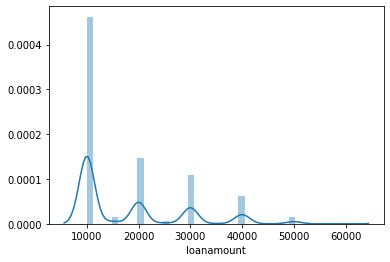

In [55]:
sns.distplot(loan_perf['loanamount'])

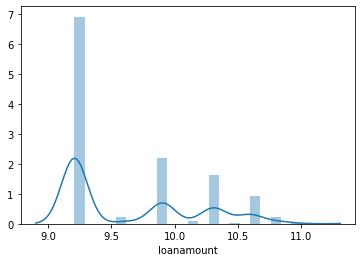

In [56]:
loan_perf['loanamount'] =  np.log1p(loan_perf['loanamount'])
sns.distplot(loan_perf['loanamount'])

In [78]:
#create some feature based on domain knowledge

loan_prev.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,termdays_bin
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2.0,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30.0,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,0
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9.0,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30.0,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,0
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8.0,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30.0,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,0
3,3,8a8588f35438fe12015444567666018e,301861541,5.0,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15.0,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,0
4,4,8a85890754145ace015429211b513e16,301941754,2.0,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15.0,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,0


In [104]:
#Create feature interest
loan_prev['interest_elapsed'] = loan_prev['totaldue'] - loan_prev['loanamount']

In [108]:
#Groupby customer id and calculate their total loans taken
loannumber_count = loan_prev.groupby(by='customerid').agg(['count'])[['loannumber']].reset_index()

#merge back to dataset on customer_id
loan_prev = loan_prev.merge(right=loannumber_count, how='left', on='customerid')

loan_prev.head()

## POLYNOMIAL FEATURES

Creates interaction features among variables

In [113]:
loan_prev.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,termdays_bin,interest_elapsed,"(loannumber, count)"
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2.0,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30.0,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,0,3000.0,11
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9.0,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30.0,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,0,3000.0,11
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8.0,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30.0,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,0,3800.0,11
3,3,8a8588f35438fe12015444567666018e,301861541,5.0,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15.0,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,0,1500.0,6
4,4,8a85890754145ace015429211b513e16,301941754,2.0,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15.0,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,0,1500.0,2


In [114]:
#Use Sklearn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ['loanamount', 'totaldue', 'termdays']
crossed_feats = poly.fit_transform(loan_prev[to_cross])

In [116]:
crossed_feats.shape

(18183, 10)

### NORMALIZATION OF FEATURES
Normalization helps change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

Normalization is very important for distant based models like KNN and also helps speed up trainng in Neural Nets.

Some Normalization functions available in sklearn:

    1. StandardScaler: Standardize features by removing the mean and scaling to unit variance.
    2. RobustScaler: Scale features using statistics that are robust to outliers.
    3. MinMaxScaler: Transforms features by scaling each feature to a given range. Range (Depends on You)

In [118]:
#Use standard scaler
#Note: If you have a train and test set, NEVER FIT STANDARD SCALER TO THE TEST/VAL SET! 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data1 = sc.fit_transform(loan_prev[to_cross])

In [122]:
scaled_data1

array([[-0.69834727, -0.62877649,  0.30213166],
       [-0.69834727, -0.62877649,  0.30213166],
       [ 0.37780919,  0.40432506,  0.30213166],
       ...,
       [-0.69834727, -0.62877649,  0.30213166],
       [-0.69834727, -0.62877649,  0.30213166],
       [-0.69834727, -0.62877649,  0.30213166]])

In [123]:
#Use Robust scaler
#Note: If you have a train and test set, NEVER FIT ROBUST SCALER TO THE TEST/VAL SET! 

from sklearn.preprocessing import RobustScaler

robsc = RobustScaler()
scaled_data2 = robsc.fit_transform(loan_prev[to_cross])

In [126]:
scaled_data2

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [1.        , 0.83076923, 0.        ],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [132]:
#Use MinMaxScaler scaler

#Note: If you have a train and test set, NEVER FIT MINMAXSCALER TO THE TEST/VAL SET! 

from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0,5))
scaled_data3 = minsc.fit_transform(loan_prev[to_cross])

In [135]:
scaled_data3

array([[0.74468085, 0.73859242, 1.        ],
       [0.74468085, 0.73859242, 1.        ],
       [1.80851064, 1.57385924, 1.        ],
       ...,
       [0.74468085, 0.73859242, 1.        ],
       [0.74468085, 0.73859242, 1.        ],
       [0.74468085, 0.73859242, 1.        ]])

---------------------------------------------------------------------------------------------

### WORKING WITH DATE/TIME FEATURES
There are numerous things we can do with dates and time. Some of which are:
    
    1. Get date components (Day of week, Day of year, Hour, Minute, Seconds, Quarter, Day of Month)
    2. Get time based features like (Evening, Noon, Night)
    3. Get seasonal features like Rainy season, Dry Season, Harmattan Period. (Winter, Summer, Autumn).
    4. Country specific features like National Holidays, Religious breaks, Festive periods etc


In [138]:
# Extract date components using Pandas
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,10.308986,34500.0,30,0
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,9.615872,17250.0,30,0
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,9.903538,22250.0,15,0
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,9.210440,11500.0,15,0
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,10.596660,44000.0,30,0


In [139]:
#First convert to pandas datetime format
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])
loan_perf['creationdate'] = pd.to_datetime(loan_perf['creationdate'])

In [140]:
loan_perf.dtypes

customerid               object
systemloanid              int64
loannumber              float64
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int64
good_bad_flag             int64
dtype: object

In [165]:
loan_perf['date_elapsed_in_secs'] = (loan_perf['approveddate'] - loan_perf['creationdate']) / np.timedelta64(1,'s') #can subtitute with [h,m,s]
loan_perf.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approved_day,approved_week,approved_hour,date_elapsed_in_secs
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,10.308986,34500.0,30,0,25,30,8,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,9.615872,17250.0,30,0,5,27,17,3623.0
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,9.903538,22250.0,15,0,6,27,14,3606.0


In [166]:
#use pandas built in functions
loan_perf['approved_day'] = loan_perf['approveddate'].dt.day
loan_perf['approved_week'] = loan_perf['approveddate'].dt.week
loan_perf['approved_hour'] = loan_perf['approveddate'].dt.hour

In [167]:
loan_perf.head(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approved_day,approved_week,approved_hour,date_elapsed_in_secs
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,10.308986,34500.0,30,0,25,30,8,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,9.615872,17250.0,30,0,5,27,17,3623.0


SEE MORE DATETIME PROPERTIES [HERE](https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#datetimelike-properties)

In [169]:
#Get night afternoon and evening

def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
loan_perf['period_of_day'] = loan_perf['approved_hour'].map(map_hours)
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,approved_day,approved_week,approved_hour,date_elapsed_in_secs,period_of_day
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,10.308986,34500.0,30,0,25,30,8,3609.0,morning
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,9.615872,17250.0,30,0,5,27,17,3623.0,evening
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,9.903538,22250.0,15,0,6,27,14,3606.0,afternoon
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41,2017-07-27 18:00:35,9.210440,11500.0,15,0,27,30,19,3606.0,evening
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45,2017-07-03 22:42:39,10.596660,44000.0,30,0,3,27,23,3606.0,evening


------------------------------------------------------------------------------------------------------
### WORKING WITH LATITUDES AND LONGITUDES FEATURES

1. Manhattan distance between two points: It is the sum of horizontal and vertical distance between two points.

   
2. haversine Distance: The haversine distance is the great-circle distance between two points on a sphere given their longitudes and latitudes. It is very Important in navigation.

3. Bearing: The bearing is the compass direction to travel from a starting point, and must be within the range 0 to 360.

4. You can use google maps to get the actual address. (Kinda slow and feasible for large dataset).




In [181]:
#get sendy logistic data
sendy_data = pd.read_csv('sendy_logistics.csv')
sendy_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


In [182]:
#Haversine distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [187]:
sendy_data['distance_haversine'] = haversine_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

sendy_data['distance_haversine'].head()

0     1.930333
1    11.339849
2     1.880079
3     4.943458
4     3.724829
Name: distance_haversine, dtype: float64

In [188]:
#Manhattan distnace
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 -lat1)
    b = np.abs(lng1 - lng2)
    return a + b

In [189]:
sendy_data['distance_manhattan'] = manhattan_distance(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

sendy_data['distance_manhattan'].head()

0    0.017978
1    0.141406
2    0.022588
3    0.061487
4    0.046143
Name: distance_manhattan, dtype: float64

In [190]:
#Bearing
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [191]:
sendy_data['bearing'] = bearing_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

sendy_data['bearing'].head()

0     -2.076903
1    -56.392163
2    -64.183866
3    -57.091553
4    148.114398
Name: bearing, dtype: float64

In [195]:
#Get center of lat and longitude
sendy_data['center_latitude'] = (sendy_data['Pickup Lat'].values + sendy_data['Destination Lat'].values) / 2
sendy_data['center_longitude'] = (sendy_data['Pickup Long'].values + sendy_data['Destination Long'].values) / 2
sendy_data['center_latitude'].head()

0   -1.309080
1   -1.323229
2   -1.304603
3   -1.269224
4   -1.280819
Name: center_latitude, dtype: float64

In [196]:
sendy_data.head(3).T

,0,1,2
Order No,Order_No_4211,Order_No_25375,Order_No_1899
User Id,User_Id_633,User_Id_2285,User_Id_265
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,3
Personal or Business,Business,Personal,Business
Placement - Day of Month,9,12,30
Placement - Weekday (Mo = 1),5,5,2
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM
Confirmation - Day of Month,9,12,30
Confirmation - Weekday (Mo = 1),5,5,2


-------------------------------------------------------------------------------------------------------
### AUTO FEATURE ENGINEERING WITH DEEP FEATURE SYNTHESIS (Featuretools)
<img src="images/fftol.png" style="padding:50px;">


Featuretools is a framework to perform automated feature engineering. It excels at transforming temporal and relational datasets into feature matrices for machine learning. [Official Docs](https://docs.featuretools.com/)

Installation

```pip install featuretool```
 Or 
```conda install -c conda-forge featuretools```

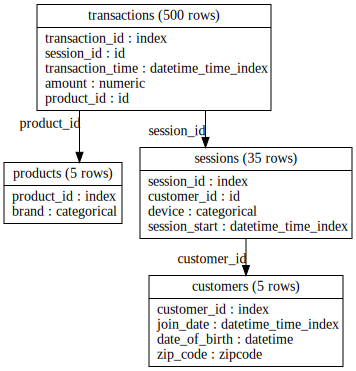

In [1]:
import featuretools as ft
data = ft.demo.load_mock_customer(return_entityset=True)
data.plot()

In [2]:
data = ft.demo.load_mock_customer()
customers_df = data['customers']
sessions_df = data['sessions']
transactions_df = data['transactions']

First, let's understand the following:

**Entity:** An Entity can be considered as a representation of a Pandas DataFrame.

**EntitySet:** An EntitySet is a collection of multiple entities.

In [3]:
# Create new entityset
es = ft.EntitySet(id = 'sales_data')

Let us add our dataframes to it. The order of adding dataframes is not important. To add a dataframe to an existing entityset, we do the below operation.

In [4]:
# Create an entity from the customers dataframe

es = es.entity_from_dataframe(entity_id = 'sales', 
                              dataframe = customers_df, 
                              index = 'customer_id', 
                              time_index = 'join_date' )

So we did the following...

1. Provided a entity_id: This is just a name. Put it as customers.
2. dataframe name set as customers_df
3. index : This argument takes as input the primary key in the table
4. time_index : The time index is defined as the first time that any information from a row can be used. For customers, it is the joining date. For transactions, it will be the transaction time.

In [5]:
es

Entityset: sales_data
  Entities:
    sales [Rows: 5, Columns: 4]
  Relationships:
    No relationships

--------------------------------------------------------
Let's add the other features

In [6]:
# adding the transactions_df
es = es.entity_from_dataframe(entity_id="transactions",
                                 dataframe=transactions_df,
                                 index="transaction_id",
                               time_index="transaction_time",
                               variable_types={"product_id": ft.variable_types.Categorical})

# adding sessions_df
es = es.entity_from_dataframe(entity_id="sessions",
            dataframe=sessions_df,
            index="session_id", 
            time_index = 'session_start')

In [7]:
es

Entityset: sales_data
  Entities:
    sales [Rows: 5, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    sessions [Rows: 35, Columns: 4]
  Relationships:
    No relationships

----------------------------------------------------------------------------------
Now we have added all three dataframes but we have not defined any relationships. 

In [11]:
# adding the customer_id relationship
cust_relationship = ft.Relationship(es["sales"]["customer_id"],
                       es["sessions"]["customer_id"])

# Add the relationship to the entity set
es = es.add_relationship(cust_relationship)

# adding the session_id relationship
sess_relationship = ft.Relationship(es["sessions"]["session_id"],
                       es["transactions"]["session_id"])

# Add the relationship to the entity set
es = es.add_relationship(sess_relationship)

In [12]:
es

Entityset: sales_data
  Entities:
    sales [Rows: 5, Columns: 4]
    transactions [Rows: 500, Columns: 5]
    sessions [Rows: 35, Columns: 4]
  Relationships:
    sessions.customer_id -> sales.customer_id
    transactions.session_id -> sessions.session_id

------------------------------------------------------------------------------------------------
#### We  now have our datasets as well as the relationships. Now, sit back and let featuretools do the heavy work!

In [15]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity="sales",max_depth = 2)

feature_matrix.head()

,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,NUM_UNIQUE(sessions.WEEKDAY(session_start)),MODE(sessions.YEAR(session_start)),MODE(sessions.DAY(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.WEEKDAY(session_start)),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
5,60091,6,3,mobile,6349.66,44.095630,149.02,-0.025941,7.55,80.375443,...,1,2014,1,1,3,2,1,3,5,mobile
4,60091,8,3,mobile,8727.68,45.068765,149.95,-0.036348,5.73,80.070459,...,1,2014,1,1,1,2,1,3,4,mobile
1,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,...,1,2014,1,1,4,2,1,3,1,mobile
3,13244,6,3,desktop,6236.62,43.683296,149.15,0.418230,5.89,67.060430,...,1,2014,1,1,1,2,1,3,3,desktop
2,13244,7,3,desktop,7200.28,37.705178,146.81,0.098259,8.73,77.422366,...,1,2014,1,1,3,2,1,3,2,desktop


In [16]:
feature_defs

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: MODE(sessions.device)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: COUNT(transactions)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: DAY(join_date)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: SUM(sessions.STD(transactions.amount))>,
 <Feature: SUM(sessions.MAX(transactions.amount))>,
 <Feature: SUM(sessions.NUM_UNIQUE(transactions.product_id))>,
 <Feature: SUM(sessions.SKEW(transactions.amount))>,
 <Feature: SUM(sessions.MEAN(transactions.am

---------------------------------------------------------------------------------------------------------------
You can get features like the Sum of std of amount(SUM(sessions.STD(transactions.amount))) or std of the sum of amount(STD(sessions.SUM(transactions.amount))) . This is what max_depth parameter means in the function call. Here we specify it as 2 to get two level aggregations.

If we change max_depth to 3 we can get features like: MAX(sessions.NUM_UNIQUE(transactions.YEAR(transaction_time)))

---------------------------------------------------------------------------------------





<img src="images/download.png" style="width: 600px;">
